In [123]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the movies metadata csv file

In [124]:
df= pd.read_csv("movies_metadata.csv")

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [125]:
df.drop(df.index[19730],inplace=True)
df.drop(df.index[29502],inplace=True)
df.drop(df.index[35585],inplace=True)

In [126]:
df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]

In [127]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II


Check if rows contain any null values

In [128]:
df_numeric.isnull().sum() 

budget            0
popularity        3
revenue           3
runtime         260
vote_average      3
vote_count        3
title             3
dtype: int64

Drop all the rows with null values

In [129]:
df_numeric.dropna(inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


the votes counts for the movies data

In [130]:
df_numeric['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

Take only the movies that have more than 30 votes

In [131]:
df_numeric['vote_count'].quantile(np.arange(.74,1,0.01))

0.74      32.00
0.75      34.00
0.76      37.00
0.77      40.00
0.78      43.00
0.79      46.00
0.80      51.00
0.81      55.00
0.82      61.00
0.83      67.00
0.84      74.00
0.85      83.00
0.86      92.00
0.87     104.74
0.88     119.00
0.89     139.00
0.90     161.00
0.91     193.00
0.92     230.00
0.93     283.00
0.94     349.00
0.95     435.90
0.96     581.00
0.97     827.94
0.98    1243.88
0.99    2196.84
Name: vote_count, dtype: float64

In [132]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [133]:
df_numeric.shape

(12178, 7)

# Normalize data

Normalize the data with MinMax scaling provided by sklearn

In [134]:
from sklearn import preprocessing

In [135]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))

In [136]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])

In [137]:
df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343
3,0.042105,0.007045,0.029216,0.144812,0.642105,0.000214
4,0.000000,0.015315,0.027468,0.120867,0.600000,0.010111


# K-Means Clustering

In [138]:
Nc = range(1,20)

In [139]:
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [140]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

Text(0.5,1,'Elbow curve')

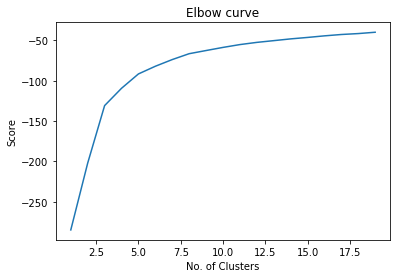

In [141]:
pl.plot(Nc,score)
pl.xlabel("No. of Clusters")
pl.ylabel("Score")
pl.title("Elbow curve")

In [142]:
kmeans =KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [143]:
len(kmeans.labels_)

12178

In [144]:
df_numeric['cluster'] = kmeans.labels_

In [145]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,3
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,4
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,2
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,2
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,2


# Interpret clustering results

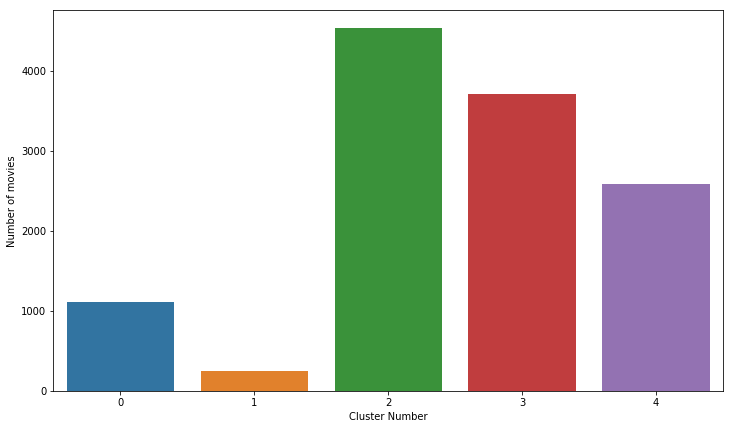

In [146]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x = df_numeric['cluster'].unique(),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [147]:
df_numeric.groupby(['cluster']).mean()

,revenue,runtime,vote_average,vote_count
cluster,,,,
0,1.640060e+07,109.595469,7.283198,300.742449
1,1.092899e+07,94.119195,5.020511,126.905186
2,1.503005e+07,101.019430,6.231795,175.266726
3,6.358566e+08,126.371542,6.917787,4802.359684
4,1.652781e+08,114.384964,6.227536,1156.980978


In [148]:
size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)

In [149]:
size_array

[3708, 2584, 4529, 253, 1104]

In [150]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
10597,180000000,18.1354,748806957.0,143.0,6.7,2709.0,"The Chronicles of Narnia: The Lion, the Witch ...",3
12588,140000000,22.0731,585174222.0,126.0,7.4,8951.0,Iron Man,3
6783,150000000,15.3682,424988211.0,129.0,6.4,3155.0,The Matrix Revolutions,3
292,8000000,140.95,213928762.0,154.0,8.3,8670.0,Pulp Fiction,3
22131,100000000,16.3824,392000694.0,180.0,7.9,6768.0,The Wolf of Wall Street,3


In [151]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
512,0,6.27908,107198790.0,125.0,5.8,188.0,Rising Sun,2
32712,6000000,9.02369,11122090.0,96.0,6.3,673.0,We Are Your Friends,2
32741,0,3.63448,0.0,90.0,6.2,58.0,Queen of Earth,2
14692,0,12.1837,0.0,126.0,6.6,107.0,Rob-B-Hood,2
15965,0,2.77558,0.0,105.0,6.2,51.0,Seven Days,2
